In [3]:
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
filename = "results/our_long_captions.json"

with open(filename, "r") as f:
    data = json.load(f)

print(data[0])
print(len(data))

{'id': 0, 'boxes': [[90.0, 3.0, 137.0, 57.0], [148.0, 4.0, 183.0, 76.0], [140.0, 4.0, 184.0, 78.0], [61.0, 13.0, 94.0, 74.0], [90.0, 2.0, 142.0, 98.0], [134.0, 5.0, 168.0, 73.0], [56.0, 0.0, 184.0, 131.0], [562.0, 38.0, 614.0, 111.0], [240.0, 31.0, 282.0, 89.0], [337.0, 47.0, 357.0, 81.0], [386.0, 41.0, 417.0, 84.0], [59.0, 0.0, 123.0, 129.0], [64.0, 10.0, 126.0, 86.0], [511.0, 41.0, 522.0, 91.0], [61.0, 61.0, 124.0, 128.0], [347.0, 61.0, 369.0, 107.0], [467.0, 45.0, 512.0, 139.0], [360.0, 56.0, 398.0, 143.0], [361.0, 56.0, 398.0, 142.0], [520.0, 43.0, 532.0, 111.0], [548.0, 45.0, 568.0, 113.0], [193.0, 83.0, 216.0, 129.0], [216.0, 80.0, 240.0, 117.0], [294.0, 79.0, 330.0, 130.0], [548.0, 62.0, 567.0, 112.0], [358.0, 88.0, 397.0, 143.0], [531.0, 47.0, 555.0, 127.0], [254.0, 96.0, 292.0, 157.0], [315.0, 80.0, 362.0, 150.0], [2.0, 123.0, 187.0, 165.0], [299.0, 132.0, 337.0, 182.0], [179.0, 128.0, 260.0, 192.0], [315.0, 159.0, 371.0, 204.0], [2.0, 5.0, 631.0, 422.0], [231.0, 197.0, 395.0,

Mean number of objects:  23.279
Mean number of unique objects:  10.929


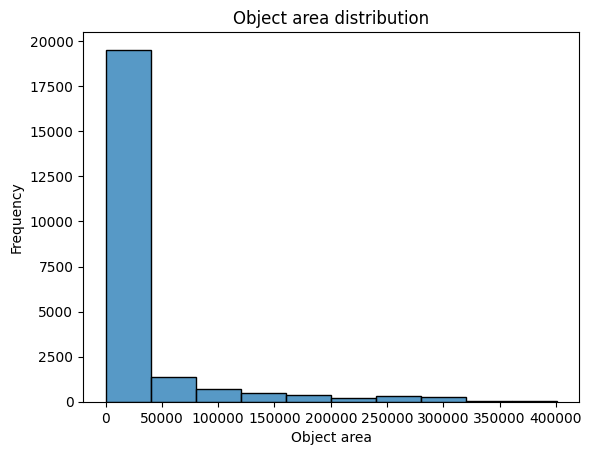

In [19]:
filename = "results/our_long_captions.json"

with open(filename, "r") as f:
    data = json.load(f)

num_objects = []
num_unique_objects = []
objects_area = []

for i in range(len(data)):
    num_objects.append(len(data[i]["boxes"]))
    num_unique_objects.append(len(set(data[i]["labels"])))

    for box in data[i]["boxes"]:
        objects_area.append((box[2] - box[0]) * (box[3] - box[1]))

print("Mean number of objects: ", np.mean(num_objects))
print("Mean number of unique objects: ", np.mean(num_unique_objects))

# plot object area distribution
plt.figure()
sns.histplot(objects_area, bins=10)
plt.xlabel("Object area")
plt.ylabel("Frequency")
plt.title("Object area distribution")  
plt.show()

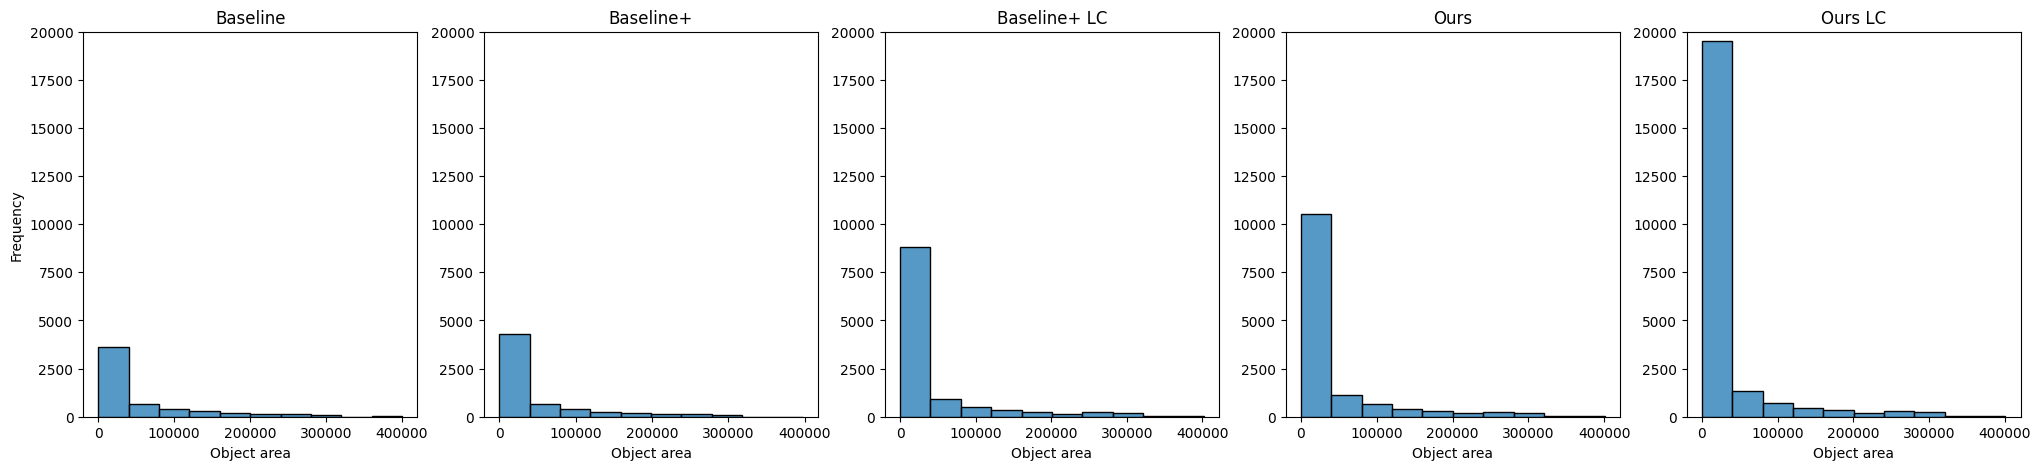

In [27]:
# use subplots to plot the distribution of object area for five models

filenames = ["results/baseline_blip_captions.json", 
             "results/baseline_gpt_short_captions.json", "results/baseline_gpt_long_captions.json", 
             "results/our_short_captions.json", "results/our_long_captions.json"]

model_names = ["Baseline", "Baseline+", "Baseline+ LC", "Ours", "Ours LC"]

# puts graphs in a 1x5 grid
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

axs[0].set_ylabel("Frequency")

for i in range(len(filenames)):
    with open(filenames[i], "r") as f:
        data = json.load(f)

    objects_area = []
    for j in range(len(data)):
        for box in data[j]["boxes"]:
            objects_area.append((box[2] - box[0]) * (box[3] - box[1]))

    axs[i].set_ylim([0, 20000])
    sns.histplot(objects_area, bins=10, ax=axs[i])
    axs[i].set_xlabel("Object area")

    
    if i > 0:
        axs[i].set_ylabel("")
        # axs[i].set_yticklabels([])
    
    axs[i].set_title(model_names[i])